In [21]:
from TrafficLight import PeriodicTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
from ModelEvaluation import Evaluator, MultiEvaluator
import matplotlib.pyplot as plt

In [22]:
light_ew = PeriodicTrafficLight()
light_ew.initialize(period=30, time_delay=0)

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

network = Model1.IntersectionNetworkSimulator()
network.initialize(grid_dimensions=(1,1))
network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, avg_arrival_time_n=10, avg_arrival_time_e=8, avg_arrival_time_s=10, avg_arrival_time_w=8)
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
network.set_observable_intersections(grid_inds=network.grid_inds)

In [23]:
evaluators = []
green_ratios = [0.3, 0.4, 0.5, 0.6, 0.7]

for green_ratio in green_ratios:
    evaluator = Evaluator()
    network.intersections[(0,0)].traffic_light_ew.green_ratio=green_ratio
    evaluator.initialize(network=network)
    output = evaluator.simulate(num_trials=30, end_time=600, delta_t=0.1)
    average = evaluator.compute_average()
    
    evaluators += [evaluator]

In [24]:
multi_eval = MultiEvaluator()
multi_eval.initialize(evaluators=evaluators, labels=green_ratios)

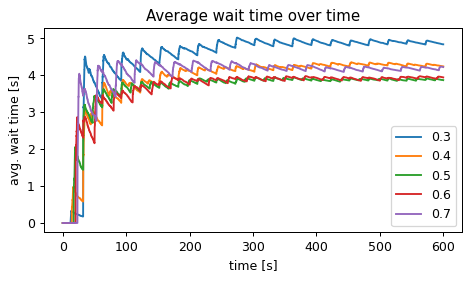

In [25]:
fig,ax = multi_eval.plot_avg_wait_times(plt=plt, fig_size=(6,3))

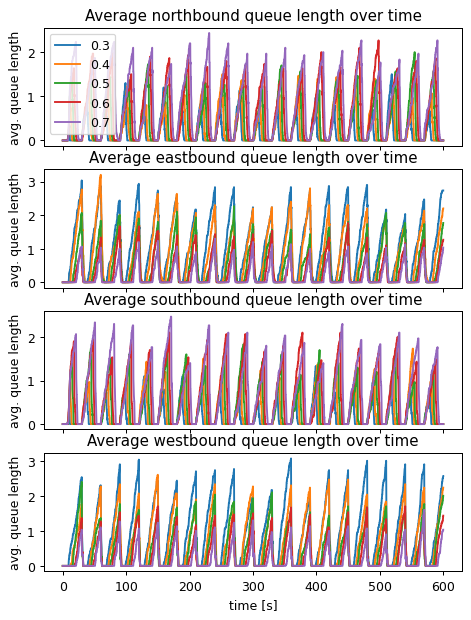

In [26]:
fig,axs = multi_eval.plot_avg_queue_lengths(plt=plt, grid_ind=(0,0), fig_size=(6,8))

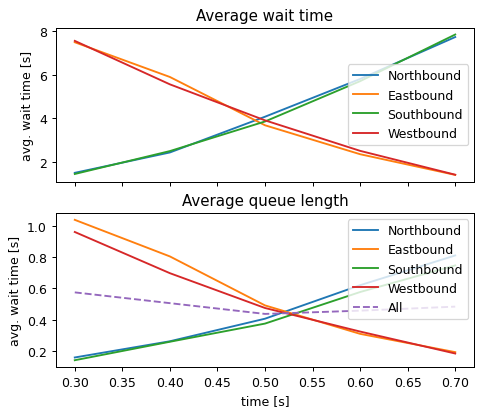

In [27]:
fig,axs = multi_eval.plot_averages(plt=plt, grid_ind=(0,0), fig_size=(6,10))